<a href="https://colab.research.google.com/github/Alirez1043/DeepLearning/blob/main/Assighment/1/Fashion_MNIST(FC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Essential Libraries**

In [5]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
tf.__version__

'2.8.0'

In [7]:
keras.__version__

'2.8.0'

# Define Function for Save Images

In [13]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Fashion_Mnist(Fully_Connected)"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Loading Fashion_MNIST Dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Let’s take a look at the shape
and data type of the training set:

In [8]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


# Scaling and spliting validation set

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# **Number of Classes**

In [11]:
n_classes = np.max(y_train) + 1
n_classes

10

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Visualize Data

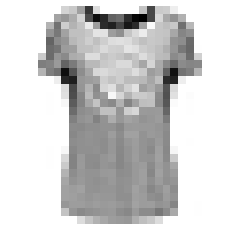

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

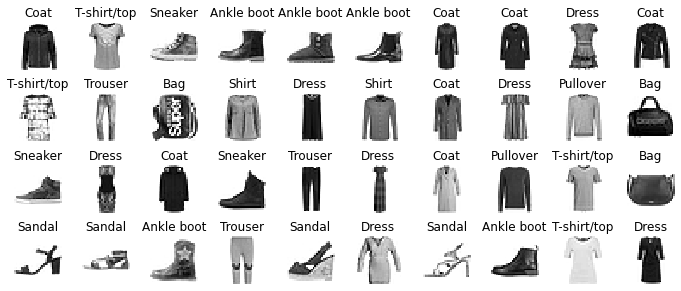

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Creating Model

Flatten does X.reshape(-1, 1)

In [15]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
def create_model() :
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])
    return model 

In [58]:
model = create_model()

In [59]:
model.layers

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 300)               235500    
                                                                 
 dense_25 (Dense)            (None, 100)               30100     
                                                                 
 dense_26 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


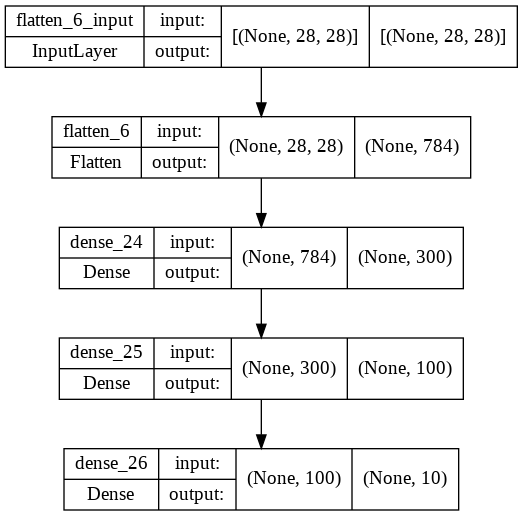

In [61]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [62]:
model.compile(loss="sparse_categorical_crossentropy",
      optimizer=keras.optimizers.SGD(learning_rate=0.01),
      metrics=["accuracy"])

In [63]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7289 - accuracy: 0.7598 - val_loss: 0.5218 - val_accuracy: 0.8196
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4939 - accuracy: 0.8265 - val_loss: 0.4401 - val_accuracy: 0.8492
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4484 - accuracy: 0.8415 - val_loss: 0.5318 - val_accuracy: 0.8010
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4211 - accuracy: 0.8515 - val_loss: 0.3970 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4015 - accuracy: 0.8593 - val_loss: 0.3824 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3829 - accuracy: 0.8650 - val_loss: 0.3740 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3702 - accuracy: 0.8686 - val_loss: 0.3659 - val_accuracy:

# Evaluation Visualize

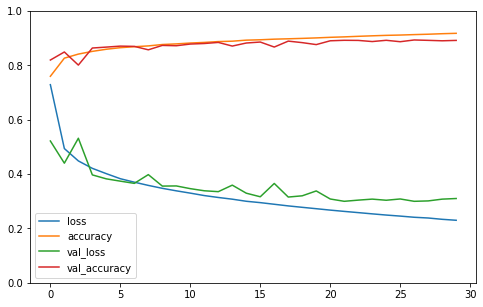

In [64]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [65]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8793


[0.342570424079895, 0.8792999982833862]

# Test the Model

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
y_pred = np.argmax(model.predict(X_new) ,axis = -1)
y_pred

array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


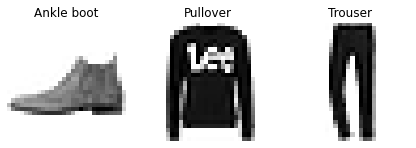

In [30]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()